# **Multilayer Perceptron (MLP) Model**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torchvision.ops as ops
import torch.optim as optim
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate the features and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch dataset and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

# Initialization
input_size = 784
output_size = 10

In [2]:
# MLP model
model = nn.Sequential(
    nn.Linear(input_size, 28),  # hidden layer
    nn.ReLU(),  # activation
    nn.Linear(28, 32),  # hidden layer
    nn.ReLU(),  # activation
    nn.Linear(32, output_size), # ouput
)
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam Optimizer

# Function to train model and print training convergence plot
def training(model, train_loader):
    num_epochs = 20
    loss_values = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        all_preds = []
        all_labels = []
        running_loss = 0.0

        for i, (inputs, labels) in enumerate(train_loader):
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            optimizer.zero_grad()  # Zero out gradients
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()

            # Get the index of the max log-probability
            _, predicted = torch.max(outputs.data, 1)

            # Append predictions and labels to lists
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        # Calculate average loss
        average_loss = running_loss / len(train_loader)
        loss_values.append(average_loss)

        # Convert the lists to numpy arrays
        all_preds = torch.tensor(all_preds)
        all_labels = torch.tensor(all_labels)

        # Calculate Accuracy, Precision, Recall, F1 Score
        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')

        print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Loss: {average_loss:.4f}")

    plt.plot(range(1, num_epochs+1), loss_values, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Convergence Plot (Loss Over Epochs)')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch [1/20], Accuracy: 0.8846, Precision: 0.8849, Recall: 0.8846, F1 Score: 0.8840, Loss: 0.4376
Epoch [2/20], Accuracy: 0.9469, Precision: 0.9468, Recall: 0.9469, F1 Score: 0.9468, Loss: 0.1775
Epoch [3/20], Accuracy: 0.9590, Precision: 0.9590, Recall: 0.9590, F1 Score: 0.9590, Loss: 0.1369
Epoch [4/20], Accuracy: 0.9660, Precision: 0.9659, Recall: 0.9660, F1 Score: 0.9660, Loss: 0.1125
Epoch [5/20], Accuracy: 0.9699, Precision: 0.9698, Recall: 0.9699, F1 Score: 0.9698, Loss: 0.0963
Epoch [6/20], Accuracy: 0.9741, Precision: 0.9740, Recall: 0.9741, F1 Score: 0.9741, Loss: 0.0847
Epoch [7/20], Accuracy: 0.9765, Precision: 0.9765, Recall: 0.9765, F1 Score: 0.9765, Loss: 0.0745
Epoch [8/20], Accuracy: 0.9791, Precision: 0.9791, Recall: 0.9791, F1 Score: 0.9791, Loss: 0.0677
Epoch [9/20], Accuracy: 0.9808, Precision: 0.9808, Recall: 0.9808, F1 Score: 0.9808, Loss: 0.0606
Epoch [10/20], Accuracy: 0.9825, Precision: 0.9825, Recall: 0.9825, F1 Score: 0.9825, Loss: 0.0554
Epoch [11/20], Accu

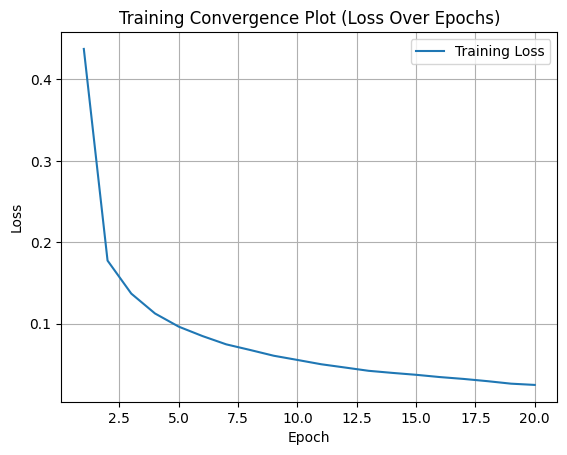

In [3]:
training(model, train_loader)

In [4]:
# Function to evaluate the model on test data
def evaluating(model, test_loader):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert the lists to numpy arrays
    all_preds = torch.tensor(all_preds)
    all_labels = torch.tensor(all_labels)

    # Calculate Accuracy, Precision, Recall, F1 Score
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


In [5]:
evaluating(model, test_loader)

Accuracy: 0.9641, Precision: 0.9642, Recall: 0.9641, F1 Score: 0.9641


#### Ablation Studies

In [6]:
# MLP model 2
model_2 = nn.Sequential(
    nn.Linear(input_size, 28),  # hidden layer
    nn.ReLU(),  # activation
    nn.Linear(28, output_size),  # ouput
)
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model_2.parameters(), lr=0.001)  # Adam Optimizer

Epoch [1/20], Accuracy: 0.8839, Precision: 0.8846, Recall: 0.8839, F1 Score: 0.8833, Loss: 0.4197
Epoch [2/20], Accuracy: 0.9456, Precision: 0.9455, Recall: 0.9456, F1 Score: 0.9455, Loss: 0.1839
Epoch [3/20], Accuracy: 0.9567, Precision: 0.9567, Recall: 0.9567, F1 Score: 0.9567, Loss: 0.1449
Epoch [4/20], Accuracy: 0.9640, Precision: 0.9640, Recall: 0.9640, F1 Score: 0.9640, Loss: 0.1208
Epoch [5/20], Accuracy: 0.9690, Precision: 0.9690, Recall: 0.9690, F1 Score: 0.9690, Loss: 0.1045
Epoch [6/20], Accuracy: 0.9714, Precision: 0.9714, Recall: 0.9714, F1 Score: 0.9714, Loss: 0.0933
Epoch [7/20], Accuracy: 0.9741, Precision: 0.9741, Recall: 0.9741, F1 Score: 0.9741, Loss: 0.0844
Epoch [8/20], Accuracy: 0.9764, Precision: 0.9764, Recall: 0.9764, F1 Score: 0.9764, Loss: 0.0765
Epoch [9/20], Accuracy: 0.9784, Precision: 0.9784, Recall: 0.9784, F1 Score: 0.9784, Loss: 0.0703
Epoch [10/20], Accuracy: 0.9796, Precision: 0.9796, Recall: 0.9796, F1 Score: 0.9796, Loss: 0.0656
Epoch [11/20], Accu

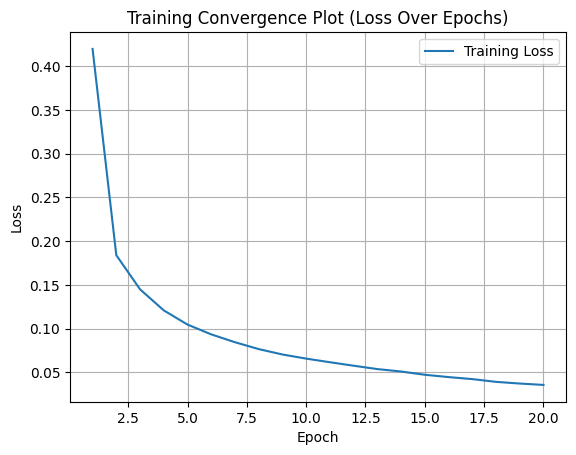

In [7]:
training(model_2, train_loader)

In [8]:
evaluating(model_2, test_loader)

Accuracy: 0.9626, Precision: 0.9626, Recall: 0.9626, F1 Score: 0.9626


In [9]:
# MLP model 3
model_3 = nn.Sequential(
    nn.Linear(input_size, 256),  # hidden layer
    nn.ReLU(),  # activation
    nn.Linear(256, 128),  # hidden layer
    nn.ReLU(),  # activation
    nn.Linear(128, 64),  # hidden layer
    nn.ReLU(),  # activation
    nn.Linear(64, output_size),  # ouput
)
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(model_3.parameters(), lr=0.001)  # Adam Optimizer

Epoch [1/20], Accuracy: 0.9155, Precision: 0.9163, Recall: 0.9155, F1 Score: 0.9154, Loss: 0.2788
Epoch [2/20], Accuracy: 0.9704, Precision: 0.9704, Recall: 0.9704, F1 Score: 0.9704, Loss: 0.0983
Epoch [3/20], Accuracy: 0.9796, Precision: 0.9796, Recall: 0.9796, F1 Score: 0.9796, Loss: 0.0654
Epoch [4/20], Accuracy: 0.9851, Precision: 0.9851, Recall: 0.9851, F1 Score: 0.9851, Loss: 0.0480
Epoch [5/20], Accuracy: 0.9870, Precision: 0.9870, Recall: 0.9870, F1 Score: 0.9870, Loss: 0.0398
Epoch [6/20], Accuracy: 0.9907, Precision: 0.9907, Recall: 0.9907, F1 Score: 0.9907, Loss: 0.0306
Epoch [7/20], Accuracy: 0.9931, Precision: 0.9931, Recall: 0.9931, F1 Score: 0.9931, Loss: 0.0222
Epoch [8/20], Accuracy: 0.9924, Precision: 0.9924, Recall: 0.9924, F1 Score: 0.9924, Loss: 0.0237
Epoch [9/20], Accuracy: 0.9944, Precision: 0.9944, Recall: 0.9944, F1 Score: 0.9944, Loss: 0.0169
Epoch [10/20], Accuracy: 0.9937, Precision: 0.9937, Recall: 0.9937, F1 Score: 0.9937, Loss: 0.0191
Epoch [11/20], Accu

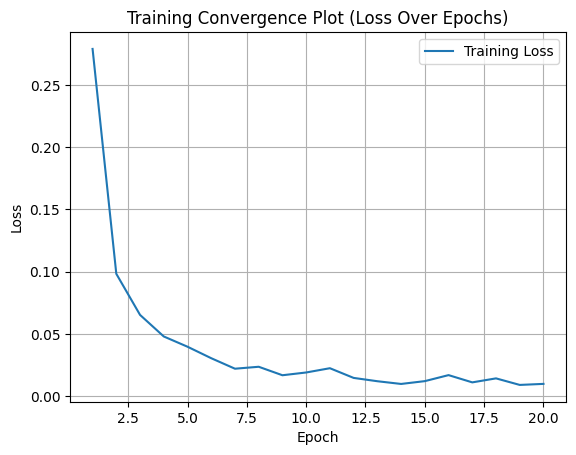

In [10]:
training(model_3, train_loader)

In [11]:
evaluating(model_3, test_loader)

Accuracy: 0.9754, Precision: 0.9755, Recall: 0.9754, F1 Score: 0.9754
